# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
The smartcab does not move during the simulation. When the light is red, the agent is receiving a small positive reward for idling that seems to increase with time as long as the light stays red. When the light is green, the agent is receiving a comparatively large negative reward that also increases with time as long as the light remains green. The system is positively rewarding the agent for stopping at a red light and negatively rewarding the agent for not moving during a green light.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

**In the agent.py Python file, choose three flags that can be set and explain how they change the simulation.**

1. Learning: Boolean indicating whether the agent is expected to learn. If set to false the agent will not learn, this is set to false by default so the cab remains idle the entire time.
2. Epsilon: Random exploration factor. It determines how much freedom the agent has to explore the environment randomly. 
3. Alpha: Learning factor. It determines the rate at which the agent learns.

**In the environment.py Python file, what Environment class function is called when an agent performs an action?**

The act() function.

**In the simulator.py Python file, what is the difference between the 'render_text()' function and the 'render()' function?**

The render_text() function outputs the simulated trial data to the terminal while the render() function renders it in the GUI.

**In the planner.py Python file, will the 'next_waypoint() function consider the North-South or East-West direction first?**
East-West direction will be considered first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


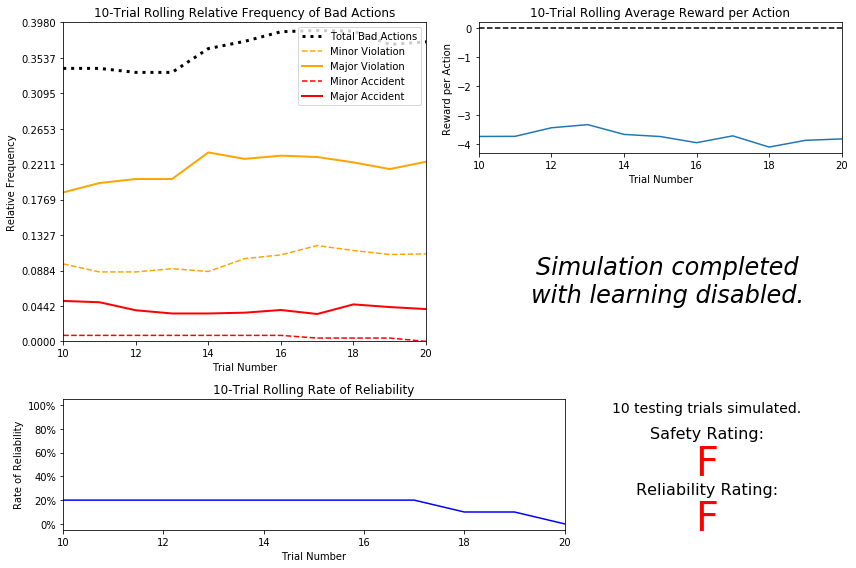

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

**How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?**

The agent is making bad decisions about 35-40% of the time, with ~4.4% of those decisions causing major accidents and a small amount causing minor accidents.

**Given that the agent is driving randomly, does the rate of reliability make sense?**

No, since it is driving randomly and is not learning, I expected to see more variation in the reliability.

**What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?**

The agent receives negative rewards overall for all the trials. It has been penalized but not heavily since it is also sometimes positively rewarded for taking random actions.

**As the number of trials increases, does the outcome of results change significantly?**

There is no significant correlation between the number of trials and the results, this is expected since the agent is not learning.

**Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?**

No, the smartcab would neither be safe nor reliable in this state. It got a rating of "F" for both safety and reliability, which is the worst rating and should not be used in real world situations.

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**

The most relevant features are: waypoint, light, oncoming, and left. The rest of the features are not as necessary.
Waypoint is important for efficiency because the agent needs to know which direction to drive to get to the destination. Light is important for safety because we don't want to run a red light and get in an accident. Oncoming is important for safety for when the agent wants to turn left, it needs to check that oncoming is not going forward or turning right. Left is important for safety and efficiency for when the agent wants to turn right when the light is red, it needs to check that left is not moving forward.


Right is irrelevant because it doesn't influence the agent's actions at all when the above features are implemented. Deadline is not as relevant considering that if the above features are implemented, the efficiency is maximized and therefore the deadline doesn't help.


The features I choose are therefore waypoint, light, left, and oncoming.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Waypoint - 3 possible values (left, forward, right)
Light - 2 possible values (red, green)
Left - 4 possible values (None, left, right, forward)
Oncoming - 4 possible values (None, left, right, forward)

Size of state space = 3*2*4*4 = 96

For this state space size I think its definitely possible for the agent to learn a policy for each possible state within a reasonable number of training trials. I think this is doable in 500-1000 training trials, which is a reasonable number.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

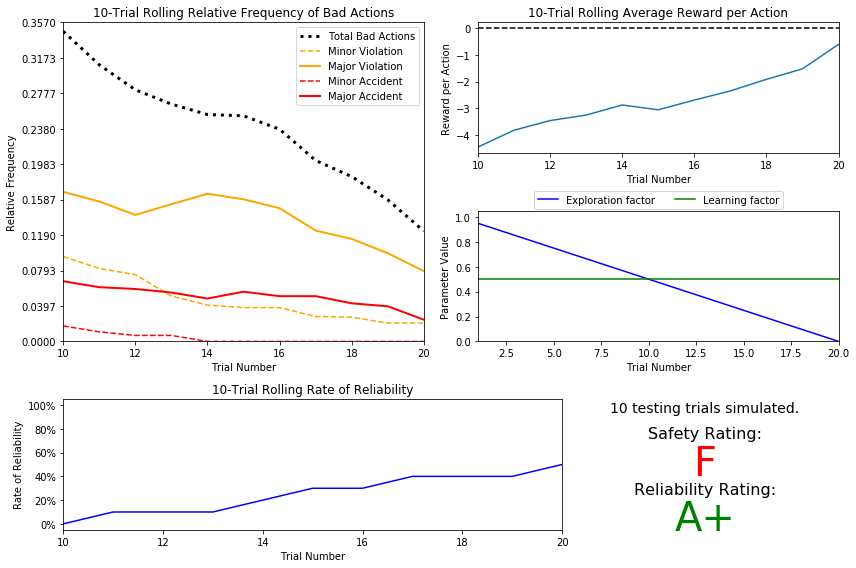

In [7]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

The only thing similar between the 2 driving agents is the safety rating of "F" in both cases. The Q-Learning agent reduces the number of bad decisions, violations, and accidents over time as it learns that can be seen from the chart above. The reliability rating also increases over time as does the average reward compared to the basic driving agent.

**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

The driving agent required 20 training trials before testing. Yes it makes sense because the default starting epsilon is 1.0, and with a linear decay function decreasing it by 0.05 each trial, after 20 trials it will pass the default threshold of 0.05 and start to test on what it has learned.

**Is the decaying function you implemented for  ϵ
  (the exploration factor) accurately represented in the parameters panel?**
  
Yes, as the number of trials increase, epsilon decreases linearly while at the same time the average reward increases and the number of bad actions decreases.

**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

Yes as the number of training trials increased, the number of bad actions decreased and the average reward increased.

**How does the safety and reliability rating compare to the initial driving agent?**

The safety rating is the same as the basic driving agent with a score of "F". However, the reliability rating is drastically improved over the basic driving agent with a score of "A+", the highest possible score.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

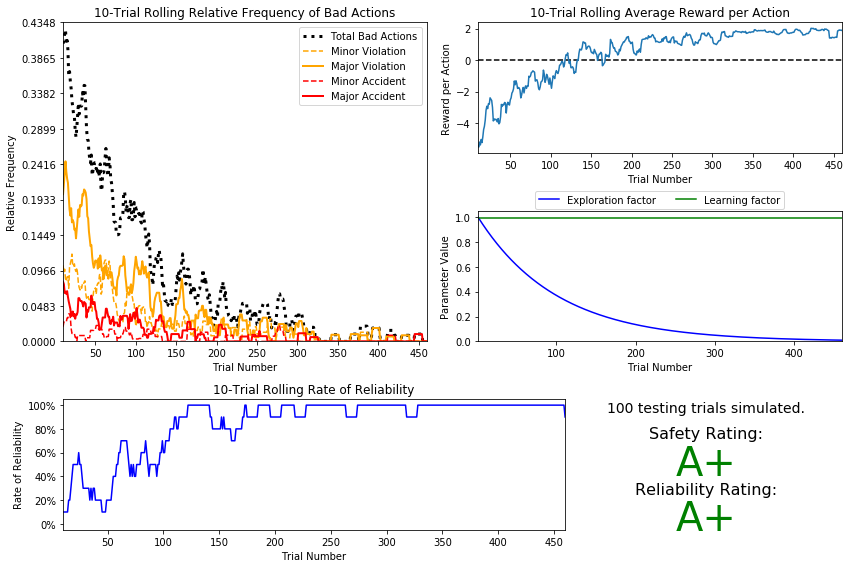

In [19]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**

**What decaying function was used for epsilon (the exploration factor)?**

I used epsilon = a^t.

**Approximately how many training trials were needed for your agent before begining testing?**

Around 460 training trials were needed.

**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

I used an epsilon-tolerance of 0.01 and alpha of 0.99. This allowed more training trials and opportunity to learn the best action for each state. Since the size of the chosen state space is 96 the system should be given an opportunity to visit each of the states at least once in order to build the Q-table. With the decaying function I chose, alpha had to be high in order to slow the decay rate down, which also allows the agent to explore more freely during the beginning, giving it more opportunity to visit more states and build up the Q-table. Since alpha is high, the agent also has very short memory and learns very quickly, this helps reduce the number of training trials needed for the agent to learn which state-actions result in largest reward or penalty.

**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

The reliability rating was the same as the previous with a score of "A+", but the safety rating improved significantly from "F" to "A+".

**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

Absolutely. It scored the highest rating possible for both safety and reliability based on an appropriate number of simulated testing trials considering the number of training trials.

**Are you satisfied with the safety and reliability ratings of the Smartcab?**

Yes I've very satisfied.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 

**Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? You can explain with words or a table, but you should thoroughly discuss the optimal policy.**

The optimal policy can be broken down by the light feature; if the light is green then for most cases the optimal policy is the next waypoint, because you have the right of way for most possible actions. The exception is if the agent wants to turn left, for which it needs to check that oncoming is not going forward or turning right. If oncoming is going forward or turning right, the optimal policy is None.

If the light is red then there are more considerations to take into account. If the light is red and the next waypoint is front or left, then the optimal policy is None, because otherwise it will result in a violation and possible accident. If the light is red and the next waypoint is right, the optimal policy is determined by the agent on the left. If left is moving forward, the optimal policy is None, otherwise the optimal policy is right.

**Next, investigate the 'sim_improved-learning.txt' text file to see the results of your improved Q-Learning algorithm. For each state that has been recorded from the simulation, is the policy (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?**

The state dictionary contains the following state-action values:

/-----------------------------------------
| State-action rewards from Q-Learning
\-----------------------------------------

('left', 'green', 'forward', 'left')
 -- forward : 0.86
 -- None : -4.92
 -- right : 0.00
 -- left : 2.88

('right', 'green', 'forward', 'right')
 -- forward : 0.79
 -- None : 0.00
 -- right : 0.00
 -- left : -0.11

('left', 'red', 'right', 'left')
 -- forward : -10.03
 -- None : 2.17
 -- right : 1.07
 -- left : -9.36

('forward', 'green', None, None)
 -- forward : 1.54
 -- None : -5.92
 -- right : 0.13
 -- left : -0.12

('right', 'green', 'right', 'forward')
 -- forward : 1.03
 -- None : 0.00
 -- right : 2.01
 -- left : 0.00

('left', 'red', 'right', 'right')
 -- forward : -10.62
 -- None : 2.97
 -- right : 0.00
 -- left : 0.00

('left', 'green', None, 'forward')
 -- forward : -0.05
 -- None : -4.05
 -- right : 0.02
 -- left : 1.89

('left', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : -5.89
 -- right : 0.00
 -- left : 2.49

('forward', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : 2.42
 -- right : -0.67
 -- left : -38.64

('right', 'green', 'left', 'right')
 -- forward : -0.71
 -- None : -5.62
 -- right : 0.00
 -- left : 1.42

('right', 'green', None, 'right')
 -- forward : 0.55
 -- None : -5.59
 -- right : 1.77
 -- left : -0.14

('right', 'red', 'right', None)
 -- forward : -9.91
 -- None : -0.32
 -- right : 2.12
 -- left : -10.59

('right', 'green', 'right', None)
 -- forward : 0.03
 -- None : -4.04
 -- right : 1.74
 -- left : 0.04

('left', 'red', 'left', 'forward')
 -- forward : -10.15
 -- None : 1.90
 -- right : -0.13
 -- left : 0.00

('right', 'red', 'right', 'left')
 -- forward : -10.79
 -- None : 1.54
 -- right : 1.80
 -- left : -9.64

('right', 'red', 'forward', None)
 -- forward : -40.57
 -- None : 1.84
 -- right : -20.43
 -- left : -39.77

('forward', 'red', None, 'left')
 -- forward : -9.91
 -- None : 2.87
 -- right : 0.49
 -- left : -10.66

('right', 'red', None, 'forward')
 -- forward : -10.00
 -- None : -0.01
 -- right : 0.91
 -- left : -10.47

('left', 'green', 'left', 'forward')
 -- forward : 0.00
 -- None : -4.04
 -- right : 1.25
 -- left : 0.00

('right', 'red', 'left', 'forward')
 -- forward : -40.42
 -- None : 1.55
 -- right : 1.58
 -- left : -9.42

('forward', 'red', 'right', 'left')
 -- forward : -9.05
 -- None : 1.63
 -- right : 0.00
 -- left : -9.50

('right', 'red', 'right', 'forward')
 -- forward : -9.41
 -- None : 0.00
 -- right : 1.83
 -- left : 0.00

('left', 'green', 'left', 'left')
 -- forward : 0.79
 -- None : 0.00
 -- right : 0.78
 -- left : 1.29

('forward', 'red', None, 'forward')
 -- forward : -10.23
 -- None : 1.01
 -- right : 0.05
 -- left : -9.79

('forward', 'red', 'right', None)
 -- forward : -10.44
 -- None : 2.07
 -- right : -0.02
 -- left : -10.64

('forward', 'green', 'right', 'right')
 -- forward : 0.00
 -- None : 0.00
 -- right : 0.99
 -- left : 0.00

('left', 'red', 'right', None)
 -- forward : -10.58
 -- None : 1.61
 -- right : 0.53
 -- left : -39.93

('left', 'red', None, None)
 -- forward : -10.56
 -- None : 1.55
 -- right : 0.34
 -- left : -10.36

('left', 'green', 'left', None)
 -- forward : 0.04
 -- None : -5.95
 -- right : 0.61
 -- left : 2.14

('right', 'red', None, 'left')
 -- forward : -9.80
 -- None : -0.49
 -- right : 1.71
 -- left : -40.22

('right', 'green', 'forward', 'left')
 -- forward : -0.17
 -- None : -5.03
 -- right : 1.90
 -- left : 0.58

('left', 'green', None, 'left')
 -- forward : 0.29
 -- None : -5.38
 -- right : 0.13
 -- left : 0.99

('right', 'green', 'forward', None)
 -- forward : 0.87
 -- None : -4.04
 -- right : 1.51
 -- left : 0.59

('left', 'red', None, 'forward')
 -- forward : -10.00
 -- None : 0.80
 -- right : 0.32
 -- left : -10.70

('left', 'green', 'right', 'left')
 -- forward : 0.00
 -- None : -4.97
 -- right : 0.78
 -- left : 1.00

('forward', 'green', 'right', 'forward')
 -- forward : 2.35
 -- None : -5.22
 -- right : -0.42
 -- left : 0.27

('right', 'green', 'left', 'left')
 -- forward : 1.05
 -- None : -5.15
 -- right : 0.00
 -- left : 0.22

('right', 'red', None, None)
 -- forward : -9.11
 -- None : 0.79
 -- right : 2.64
 -- left : -11.16

('right', 'red', 'left', 'right')
 -- forward : -9.14
 -- None : 0.00
 -- right : 1.71
 -- left : -40.08

('right', 'red', 'left', None)
 -- forward : -9.76
 -- None : 0.64
 -- right : 1.38
 -- left : -40.53

('forward', 'red', 'forward', 'forward')
 -- forward : -40.28
 -- None : 1.02
 -- right : -19.96
 -- left : -39.24

('left', 'red', 'forward', 'right')
 -- forward : -38.65
 -- None : 2.54
 -- right : 0.00
 -- left : -38.77

('right', 'red', None, 'right')
 -- forward : -10.06
 -- None : -0.08
 -- right : 1.67
 -- left : -39.10

('left', 'green', 'forward', 'right')
 -- forward : 0.00
 -- None : -5.16
 -- right : 0.20
 -- left : 1.30

('forward', 'red', 'forward', 'left')
 -- forward : -39.77
 -- None : 1.02
 -- right : 0.00
 -- left : -39.11

('forward', 'green', 'forward', 'right')
 -- forward : 1.03
 -- None : -4.63
 -- right : 0.00
 -- left : 0.34

('forward', 'red', 'forward', None)
 -- forward : -39.32
 -- None : 2.35
 -- right : -20.15
 -- left : -39.34

('right', 'green', None, 'forward')
 -- forward : -0.16
 -- None : -4.96
 -- right : 1.73
 -- left : 0.57

('forward', 'red', 'right', 'forward')
 -- forward : -9.73
 -- None : 1.23
 -- right : -0.12
 -- left : 0.00

('right', 'green', None, 'left')
 -- forward : 0.28
 -- None : -4.57
 -- right : 1.71
 -- left : 0.35

('forward', 'green', 'forward', 'forward')
 -- forward : 2.83
 -- None : -4.83
 -- right : 0.88
 -- left : 0.46

('forward', 'green', None, 'left')
 -- forward : 2.25
 -- None : -5.80
 -- right : 0.27
 -- left : 0.07

('forward', 'green', 'left', 'right')
 -- forward : 0.00
 -- None : -5.19
 -- right : -0.16
 -- left : 0.51

('right', 'green', 'forward', 'forward')
 -- forward : 0.71
 -- None : -5.93
 -- right : 0.00
 -- left : 0.02

('forward', 'red', 'forward', 'right')
 -- forward : -39.40
 -- None : 2.32
 -- right : -20.09
 -- left : -40.87

('forward', 'red', 'left', None)
 -- forward : -9.89
 -- None : 2.53
 -- right : 0.01
 -- left : -9.17

('forward', 'red', 'left', 'right')
 -- forward : -9.59
 -- None : 0.75
 -- right : 1.21
 -- left : -40.52

('forward', 'green', 'left', 'left')
 -- forward : 1.20
 -- None : -4.61
 -- right : -0.40
 -- left : 0.18

('left', 'green', None, None)
 -- forward : 0.67
 -- None : -4.55
 -- right : -0.11
 -- left : 2.20

('right', 'green', 'right', 'left')
 -- forward : 0.23
 -- None : 0.00
 -- right : 2.44
 -- left : 0.55

('left', 'red', 'forward', None)
 -- forward : -40.97
 -- None : 1.79
 -- right : -19.35
 -- left : -40.36

('left', 'green', 'right', 'forward')
 -- forward : 0.00
 -- None : -4.18
 -- right : 0.90
 -- left : 1.47

('forward', 'red', 'left', 'forward')
 -- forward : -9.70
 -- None : 2.88
 -- right : 0.00
 -- left : -40.55

('forward', 'green', 'left', 'forward')
 -- forward : 2.38
 -- None : 0.00
 -- right : 0.28
 -- left : -0.64

('right', 'red', 'forward', 'forward')
 -- forward : -40.18
 -- None : 0.15
 -- right : -20.22
 -- left : -38.63

('forward', 'green', 'forward', None)
 -- forward : 2.07
 -- None : -4.90
 -- right : 0.64
 -- left : 0.35

('right', 'red', 'forward', 'left')
 -- forward : -39.09
 -- None : 0.24
 -- right : -20.32
 -- left : -39.93

('forward', 'red', None, None)
 -- forward : -9.57
 -- None : 1.07
 -- right : 0.85
 -- left : -10.02

('forward', 'green', 'forward', 'left')
 -- forward : 2.58
 -- None : -5.38
 -- right : 0.48
 -- left : 0.00

('right', 'green', 'left', 'forward')
 -- forward : 0.17
 -- None : -4.90
 -- right : 0.00
 -- left : 0.06

('left', 'red', 'forward', 'left')
 -- forward : -39.98
 -- None : 1.02
 -- right : -20.20
 -- left : -39.56

('forward', 'red', 'left', 'left')
 -- forward : -10.55
 -- None : 1.78
 -- right : 0.35
 -- left : -9.91

('left', 'red', 'right', 'forward')
 -- forward : -9.82
 -- None : 1.79
 -- right : 0.00
 -- left : 0.00

('left', 'green', 'left', 'right')
 -- forward : 1.31
 -- None : -5.20
 -- right : 0.00
 -- left : 2.31

('right', 'red', 'left', 'left')
 -- forward : -9.82
 -- None : 0.02
 -- right : 2.82
 -- left : 0.00

('left', 'red', 'left', 'right')
 -- forward : -10.41
 -- None : 2.51
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'forward', 'forward')
 -- forward : -39.80
 -- None : 2.76
 -- right : -20.13
 -- left : 0.00

('left', 'green', None, 'right')
 -- forward : 0.03
 -- None : -4.02
 -- right : 0.38
 -- left : 1.00

('forward', 'green', 'right', None)
 -- forward : 2.23
 -- None : -4.79
 -- right : 0.39
 -- left : 0.59

('left', 'green', 'forward', None)
 -- forward : 0.84
 -- None : -5.87
 -- right : 0.43
 -- left : 2.38

('right', 'green', 'right', 'right')
 -- forward : 0.95
 -- None : 0.00
 -- right : 2.70
 -- left : 0.12

('left', 'green', 'right', None)
 -- forward : 0.54
 -- None : -5.63
 -- right : 0.58
 -- left : 1.82

('left', 'red', None, 'right')
 -- forward : -9.95
 -- None : 2.32
 -- right : 0.90
 -- left : -39.72

('forward', 'green', 'right', 'left')
 -- forward : 2.43
 -- None : -4.15
 -- right : 0.00
 -- left : 0.00

('left', 'red', 'left', None)
 -- forward : -9.76
 -- None : 2.57
 -- right : -0.14
 -- left : -10.18

('forward', 'green', 'left', None)
 -- forward : 2.63
 -- None : -4.96
 -- right : 0.43
 -- left : 0.00

('right', 'red', 'forward', 'right')
 -- forward : -40.17
 -- None : 0.92
 -- right : -19.06
 -- left : -38.98

('left', 'green', 'forward', 'forward')
 -- forward : 0.16
 -- None : -5.75
 -- right : 0.15
 -- left : 2.53

('left', 'red', None, 'left')
 -- forward : -9.91
 -- None : 2.64
 -- right : 0.29
 -- left : -10.97

('forward', 'green', None, 'right')
 -- forward : 2.03
 -- None : -4.89
 -- right : -0.36
 -- left : 0.44

('right', 'green', None, None)
 -- forward : 0.16
 -- None : -5.28
 -- right : 1.62
 -- left : 0.11

('forward', 'red', None, 'right')
 -- forward : -9.04
 -- None : 1.30
 -- right : 0.21
 -- left : -39.31

('right', 'green', 'left', None)
 -- forward : -0.33
 -- None : -5.02
 -- right : 1.90
 -- left : 0.34

('right', 'red', 'right', 'right')
 -- forward : 0.00
 -- None : -0.02
 -- right : 2.32
 -- left : 0.00

('forward', 'green', None, 'forward')
 -- forward : 2.00
 -- None : -5.83
 -- right : -0.02
 -- left : 0.25

('left', 'red', 'left', 'left')
 -- forward : -10.62
 -- None : 1.47
 -- right : 0.36
 -- left : 0.00

For most of the states, the optimal policy learned is correct. However there are a few states for which the learned optimal policy differs from expectations.

**Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.**


('right', 'red', 'forward', 'right')
 -- forward : -40.17
 -- None : 0.92
 -- right : -19.06
 -- left : -38.98
 
The above entry shows that when the light is red, waypoint is right, and left is forward, there are large penalties for all actions except for None because it would be a violation and may cause an accident.
 
('forward', 'green', 'forward', None)
 -- forward : 2.07
 -- None : -4.90
 -- right : 0.64
 -- left : 0.35
 
The above entry shows that when the light is green and waypoint is forward, the largest reward (optimal policy) is forward. There is a high penalty for staying idle.

**Try to find at least one entry where the smartcab did not learn the optimal policy. Discuss why your cab may have not learned the correct policy for the given state.**

('right', 'green', 'forward', 'right')
 -- forward : 0.79
 -- None : 0.00
 -- right : 0.00
 -- left : -0.11
 
 The above entry show that when the light is green and the waypoint is right, the optimal policy is forward. This is unexpected because the optimal policy should be right. We can see that the reward for both None and right is exactly 0, suggesting that this state either did not occur often enough during training or occurred later on in the training process when epsilon has decayed significantly that the agent was unable to explore enough to learn the rewards for all the possible actions.
 
('right', 'green', 'left', 'right')
 -- forward : -0.71
 -- None : -5.62
 -- right : 0.00
 -- left : 1.42
 
Similar to the previous, this state seems to have learned a bit more in that it has a large penalty for None. However the reward for right is still 0 which leads to the same conclusion as above, that this state either did not occur often or mostly occurred later when epsilon has decayed significantly.

For cases like these, we can increase alpha to slow the decay rate of epsilon and increase the number of training trials. This will allow states to be visited more often and give the agent more chance to explore all actions for each state so it can learn rewards/penalties for all of them.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

One of the reasons why future rewards won't work is due to the way the environment is set up for each run; the start and destination locations are randomly generated each time and don't change for the duration of that run, the dummy agents' starting locations are also randomly generated and take random actions at each step. This makes it impossible to incorporate future rewards because you don't know what the future rewards are.

The smartcab only has access to information about it's current situation and the next waypoint given by the RoutePlanner, which already calculates the shortest path to the destination. There is a light after each action, so the agent can only take 1 action for each state. Each state-action is independent of the others.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.